# PETR 6397 Petroleum Data Analytics
## Homework 2
### Name: Guna Sekhar Siddabathuni
### Psid: 2312120

### SECTION- B

In [2]:
#Importing the required libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
#Importing the China_Oilfield.csv 
df = pd.read_csv('China_Oilfield.csv')
df.head()

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500


## 10.1. Perform data exploration

In [4]:
#Let's look at the data types and metadata in the dataset we're using. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   y       24 non-null     int64  
 2   x1      24 non-null     int64  
 3   x2      24 non-null     int64  
 4   x3      24 non-null     int64  
 5   x4      24 non-null     int64  
 6   x5      24 non-null     float64
 7   x6      24 non-null     float64
 8   x7      24 non-null     float64
 9   x8      24 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 2.0 KB


In [5]:
# Let's check if there are any null values in our dataset:
miss_values = df.isnull().sum()
miss_values


year    0
y       0
x1      0
x2      0
x3      0
x4      0
x5      0
x6      0
x7      0
x8      0
dtype: int64

In [6]:
# Lets get the descriptive statistics of our dataset
summary_statistics = df.describe()
summary_statistics

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
count,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01
mean,1994.500000,3.949742e+06,4474.916667,3487.958333,859.916667,1.254121e+07,60.349167,1.160417,13.166667,3.608029e+06
std,7.071068,2.513695e+06,3371.137983,2883.126224,487.336141,8.680148e+06,11.444300,0.258633,3.201741,2.252834e+06
min,1983.000000,1.417200e+06,689.000000,612.000000,311.000000,2.305000e+06,41.800000,0.830000,9.070000,1.417200e+06
25%,1988.750000,1.629025e+06,1845.250000,1497.250000,482.750000,5.089575e+06,48.925000,0.905000,9.982500,1.541750e+06
50%,1994.500000,3.609450e+06,3795.000000,2852.000000,731.500000,1.147070e+07,63.255000,1.145000,13.265000,3.259200e+06
75%,2000.250000,4.835625e+06,5556.250000,3548.750000,1043.250000,1.709108e+07,71.880000,1.385000,15.980000,4.665400e+06
max,2006.000000,9.623000e+06,12314.000000,11092.000000,2347.000000,3.298700e+07,72.950000,1.600000,17.740000,9.051000e+06


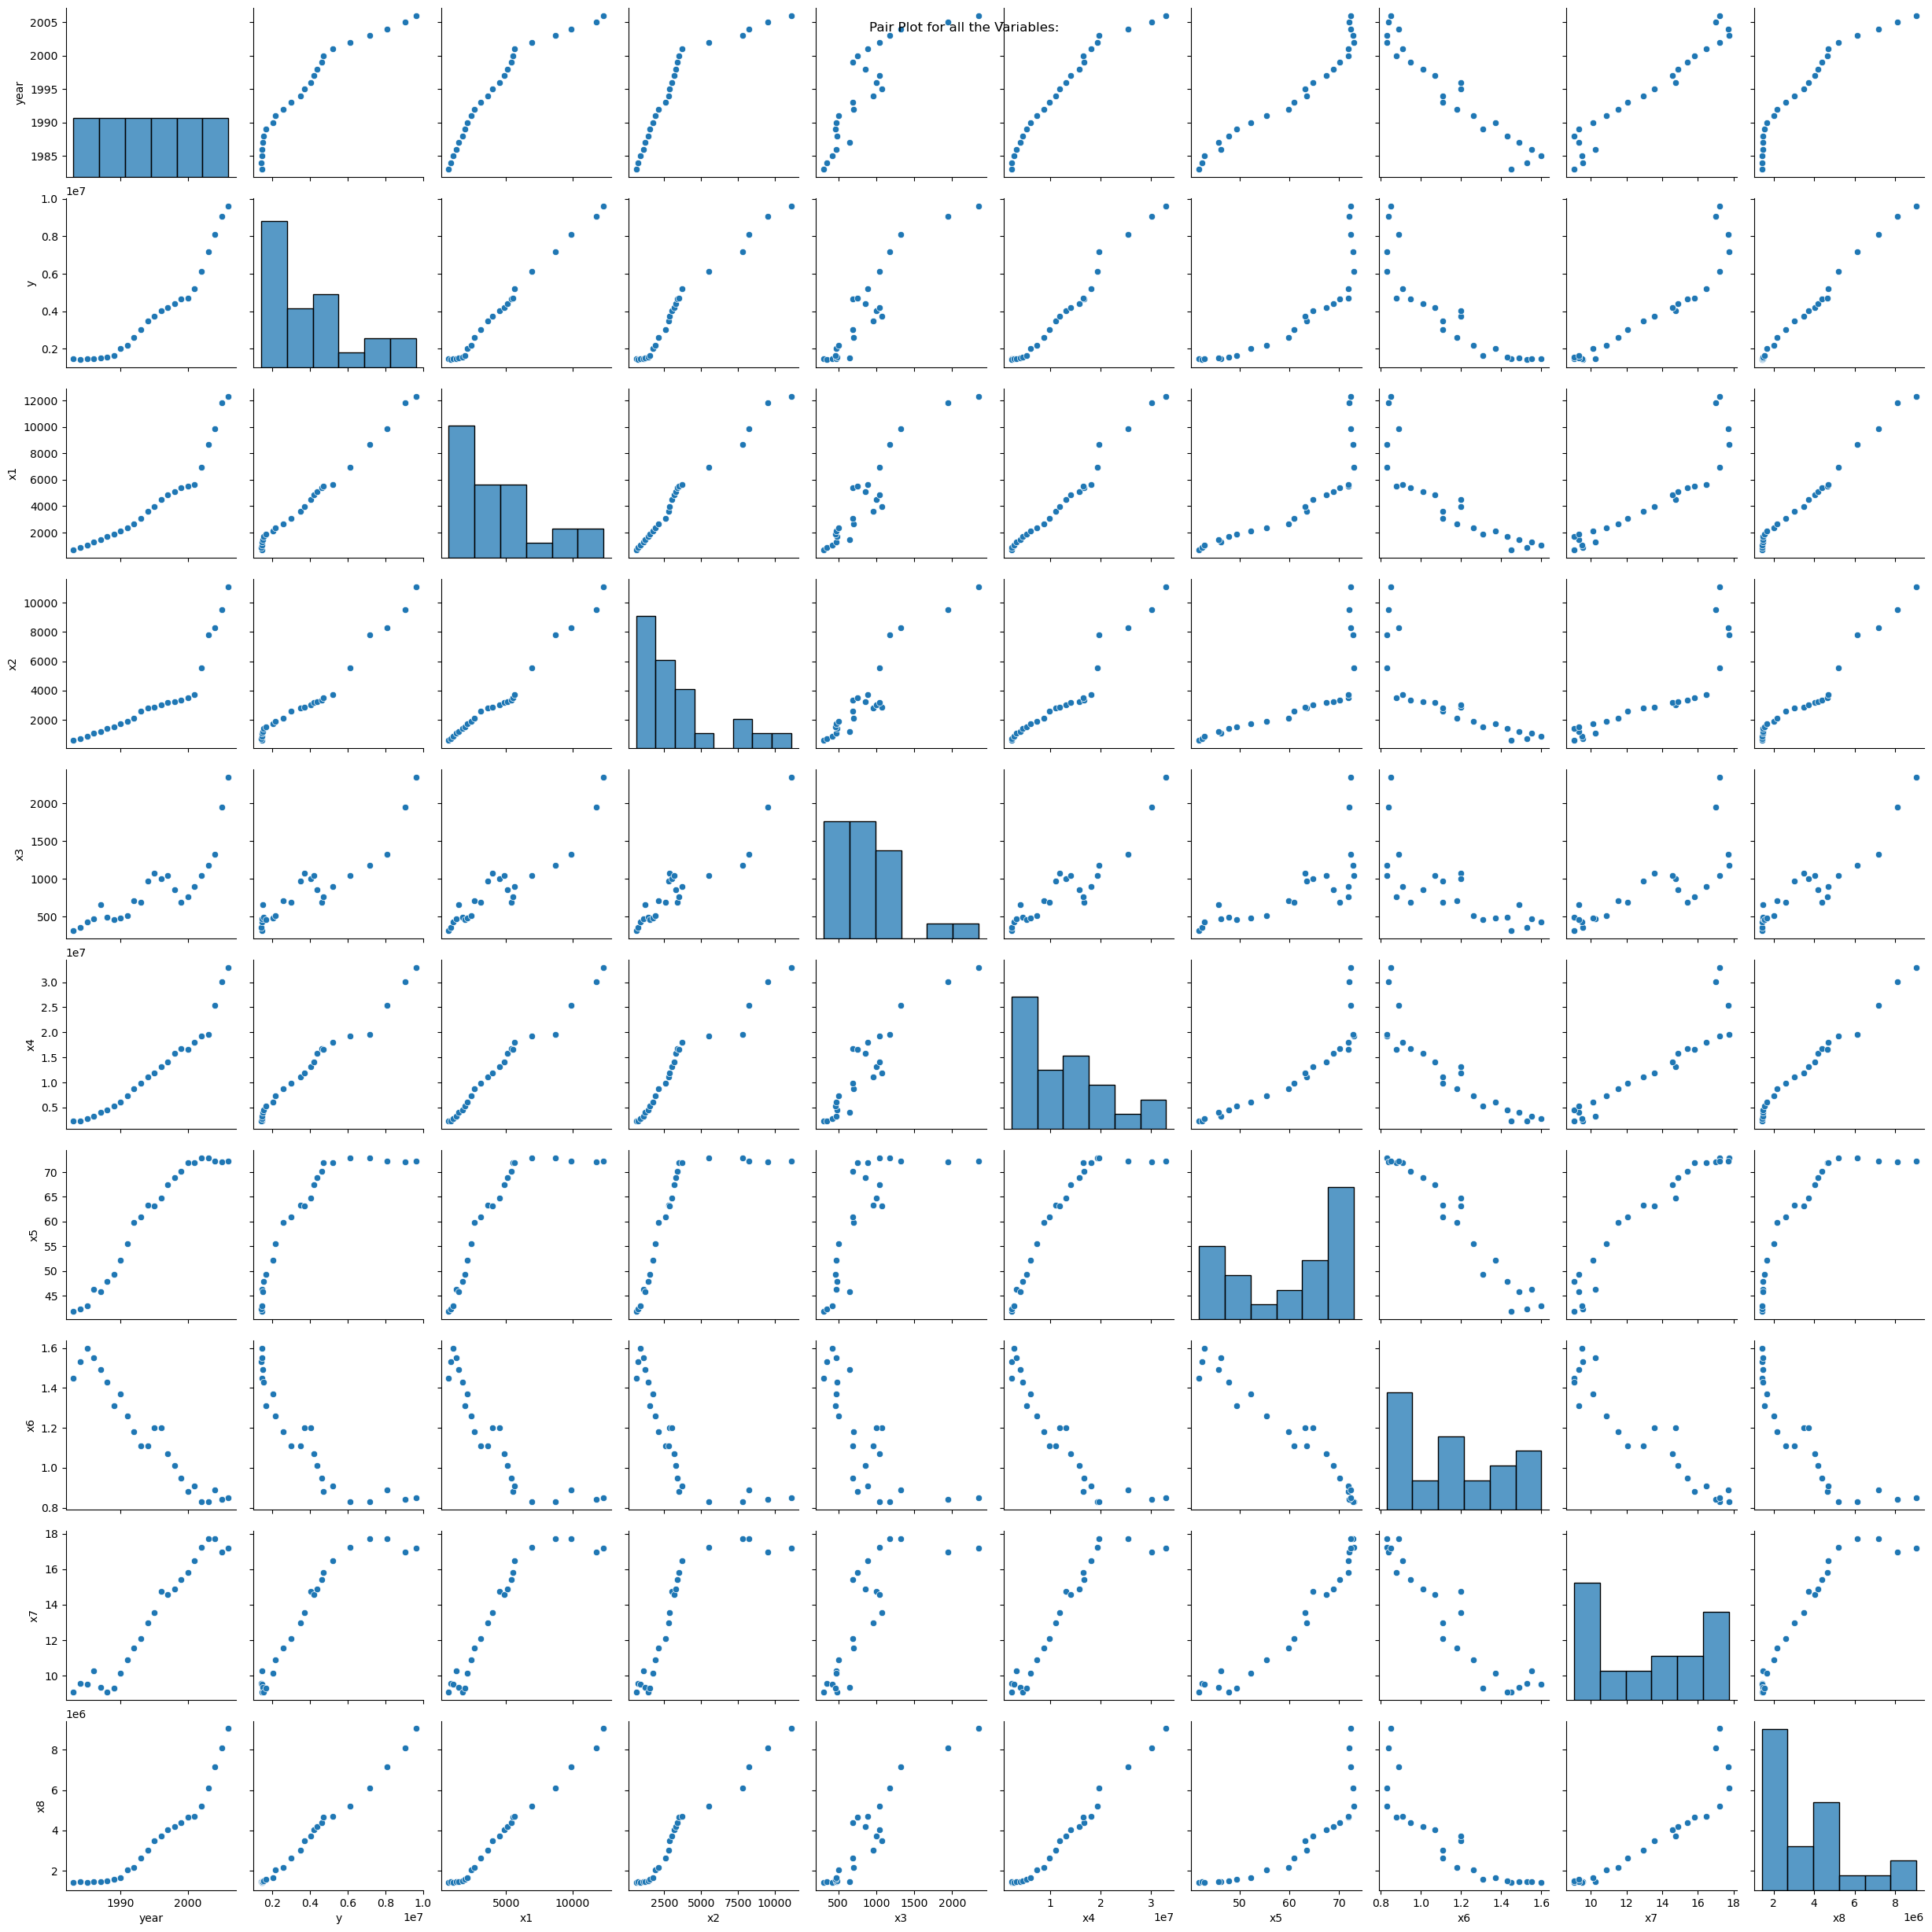

In [9]:
#Now we can do a pair plot for getting better understanding of the dataset and also we can see the relationships between the variables:
sns.pairplot(df)
plt.suptitle('Pair Plot for all the Variables: ')
plt.show()

#### By seeing the above pair plot now we can quickly examine how different variables are related to each other and to identify patterns and trends within the data.

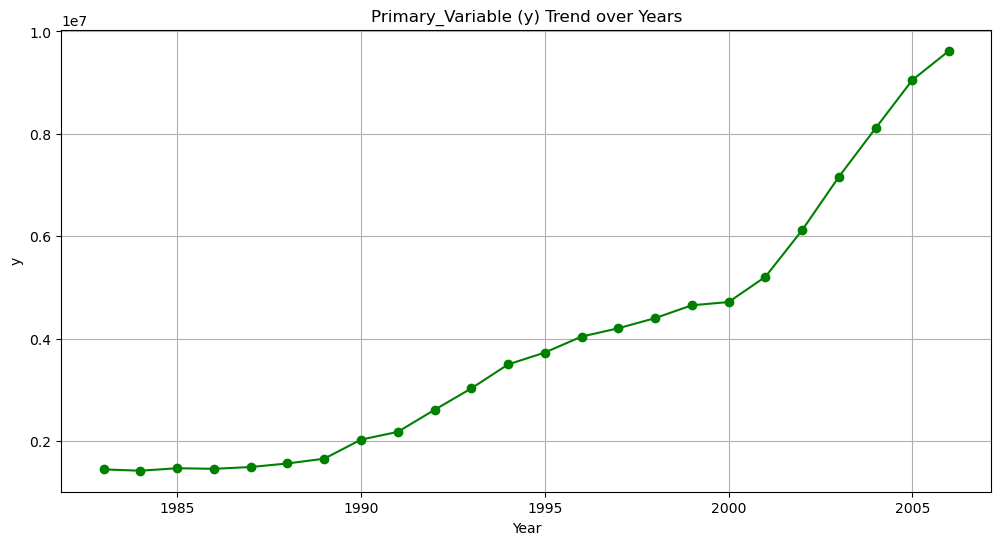

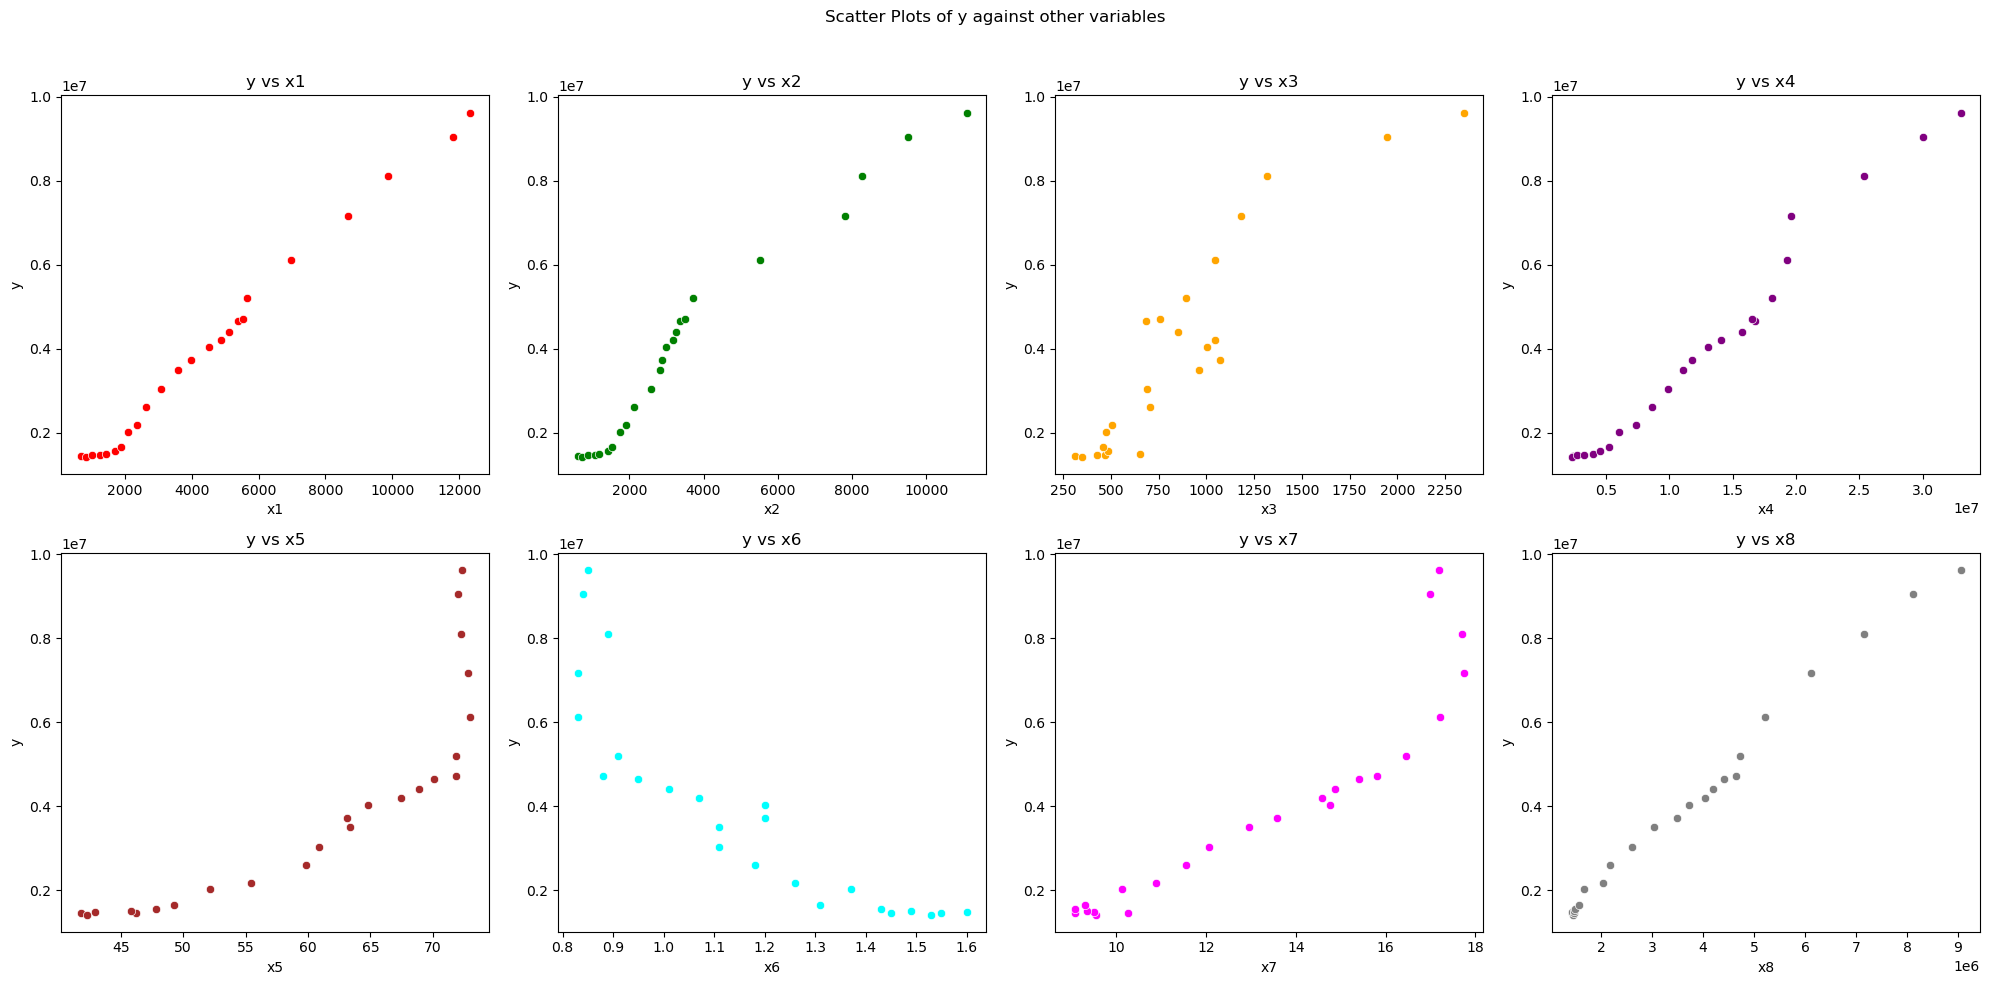

In [13]:
#Now We'll utilize line plots to delve into time series analysis and scatter plots to investigate potential correlations among variables
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot with different colors
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['y'], marker='o', linestyle='-', color='green') 
plt.title('Primary_Variable (y) Trend over Years')
plt.xlabel('Year')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Scatter plots with different colors
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Scatter Plots of y against other variables')

# List of column names for plotting
columns = df.columns[2:]  # exclude 'year' and 'y' for the scatter plots
colors = ['red', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'gray'] 

for ax, column, color in zip(axes.flatten(), columns, colors):
    sns.scatterplot(ax=ax, data=df, x=column, y='y', color=color)  # Set color here
    ax.set_title(f'y vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('y')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### The above line plot illustrates the evolution of the primary variable y across the years, offering insights into its temporal fluctuations and potential underlying patterns or trends influenced by external factors or inherent dataset characteristics.

#### By examining the scatter plots, we can discern the associations between y and the remaining variables (x1 to x8). Clear patterns or trends observed in these plots may indicate correlations between y and specific variables, aiding in the exploration of their interrelationships.

#### Correlation Analysis:

We'll calculate the correlation matrix to examine the relationships between variables. This enables us to pinpoint which variables exhibit the strongest associations with the primary variable y.

#### Time-Series Analysis:

We'll delve into trends, seasonality, and other temporal patterns present in the data. With yearly data at our disposal, we can potentially uncover long-term trends or cyclic patterns. 

Now We'll commence with the correlation analysis.

In [14]:
# Correlation matrix:
corr_matrix = df.corr()
corr_matrix

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
year,1.000000,0.944833,0.939130,0.882295,0.825611,0.961171,0.969569,-0.964394,0.971455,0.940027
y,0.944833,1.000000,0.996550,0.978326,0.918962,0.988878,0.853840,-0.878026,0.921967,0.996339
x1,0.939130,0.996550,1.000000,0.984422,0.928682,0.988735,0.839125,-0.864609,0.901486,0.994602
x2,0.882295,0.978326,0.984422,1.000000,0.934583,0.955211,0.757829,-0.799497,0.835706,0.971412
x3,0.825611,0.918962,0.928682,0.934583,1.000000,0.920414,0.716998,-0.717146,0.767403,0.925323
x4,0.961171,0.988878,0.988735,0.955211,0.920414,1.000000,0.883126,-0.898978,0.922146,0.991665
x5,0.969569,0.853840,0.839125,0.757829,0.716998,0.883126,1.000000,-0.972480,0.961326,0.848169
x6,-0.964394,-0.878026,-0.864609,-0.799497,-0.717146,-0.898978,-0.972480,1.000000,-0.942198,-0.868957
x7,0.971455,0.921967,0.901486,0.835706,0.767403,0.922146,0.961326,-0.942198,1.000000,0.916963
x8,0.940027,0.996339,0.994602,0.971412,0.925323,0.991665,0.848169,-0.868957,0.916963,1.000000


#### By seeing the correlation matrix now we will understand  the strength and direction of relationships between variables. Positive values near +1 indicate strong positive correlations, while negative values near -1 suggest strong negative correlations. Values close to 0 indicate weak or no correlation. By examining these correlations, we can identify which variables are most closely associated with each other, aiding in understanding the underlying dynamics of our dataset.

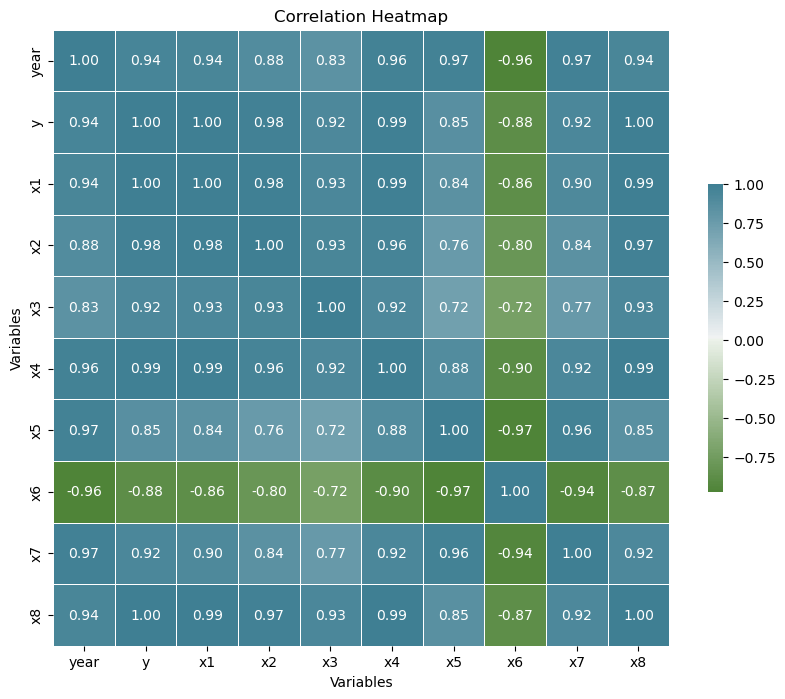

In [18]:
##Heat map for the correlation:
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(120, 220, n=200),
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

The intensity of color and the numerical value in each cell convey the magnitude and direction of correlation between variables. Red hues signify positive correlation, while blue hues signify negative correlation.

The correlation matrix reveals predominantly strong positive correlations among all variables (x1 through x8, as well as y), with values nearing 1.

Notably, several variable pairs, such as x5 with x6, x6 with x7, and x5 with x7, exhibit robust negative correlations, with values approaching -1.

#### Highlighs from the Heatmap:
The correlation heatmap reveals several key observations:

#### 1. High Positive Correlation:
Numerous pairs of variables, such as x1 and x2, x3 and x4, and y and x8, exhibit very high positive correlations close to 1. This implies that these variables likely share similar trends or may be influenced by common factors.

#### 2.Negative Correlation: 
Some variable pairs, notably x5 with x6 and x7, display strong negative correlations, indicating an inverse relationship where one variable increases as the other decreases.

#### 3.Multicollinearity Consideration:
The pervasive strong correlations among variables raise concerns about multicollinearity. In regression modeling, multicollinearity could affect the interpretability and stability of the model coefficients.

#### 4.Overall Implication:
The heatmap suggests significant interrelations among variables in the dataset. Such close correlations may suggest that variables are not entirely independent or may be capturing comparable underlying phenomena.

In summary, the heatmap provides detailed insights into the relationships between variables, highlighting the need to carefully consider multicollinearity when using these variables in regression analysis.

### Now we will see the correlation between the target variable and the independent variables more clearly by getting the scatterr plots

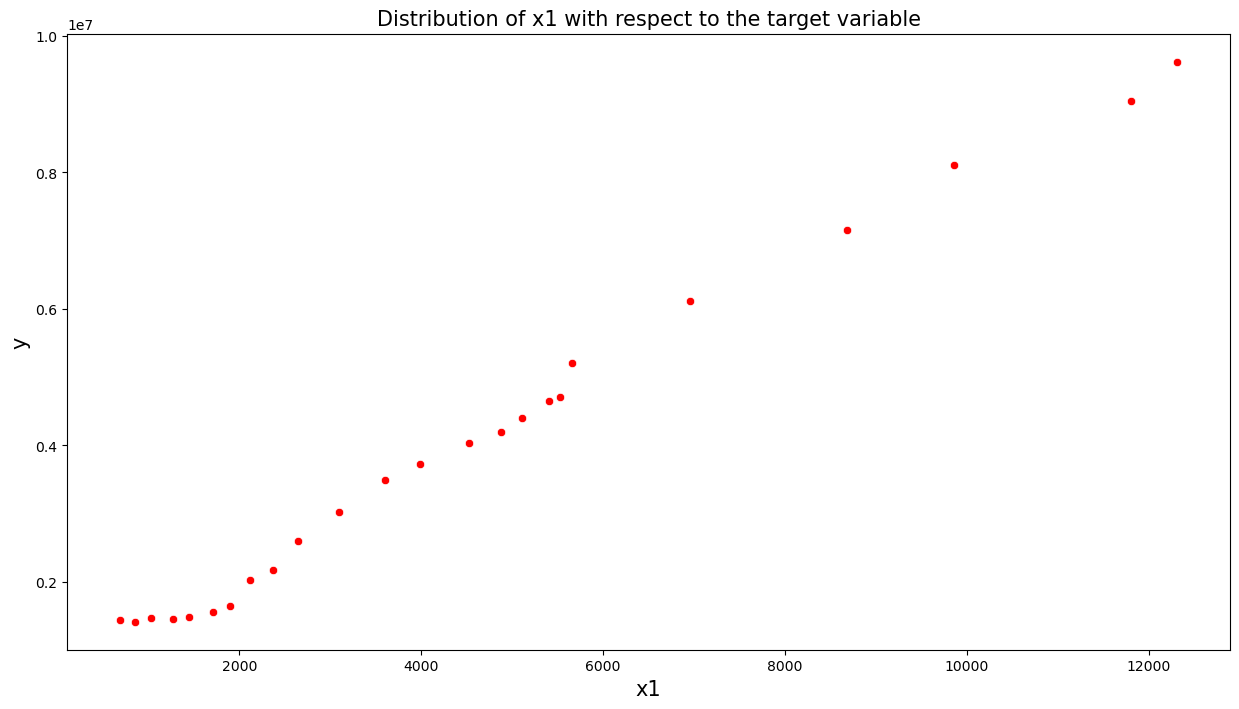

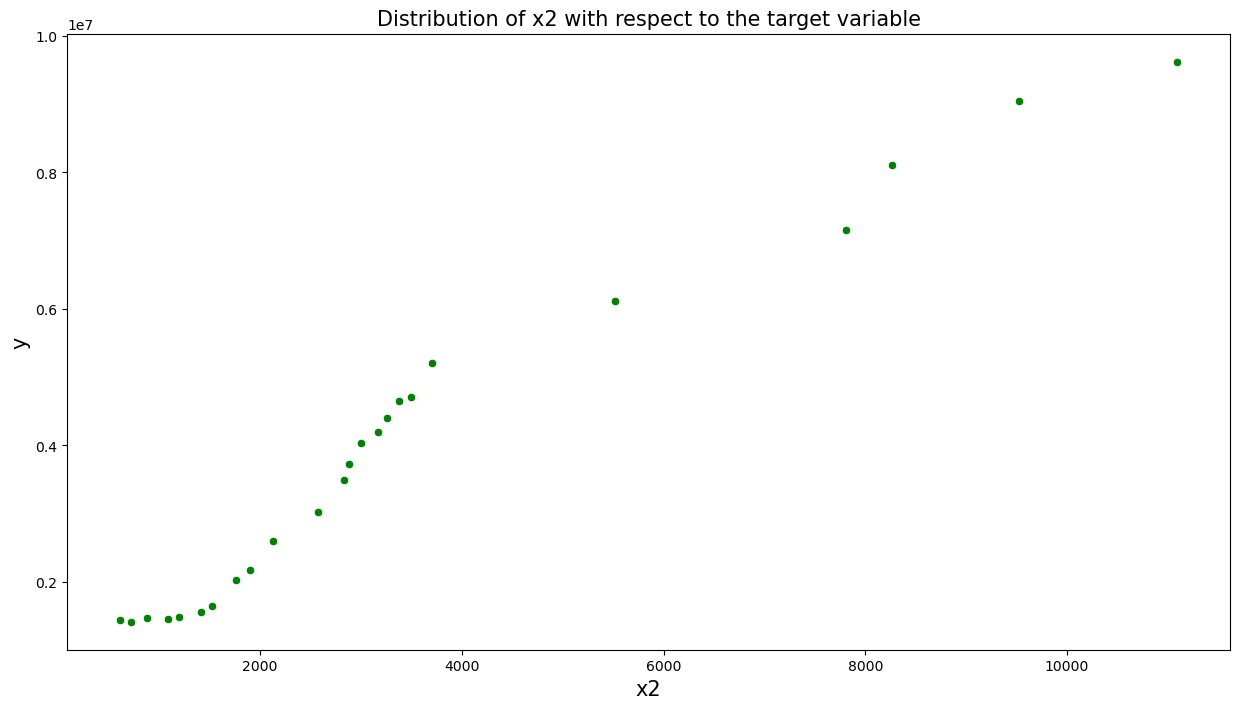

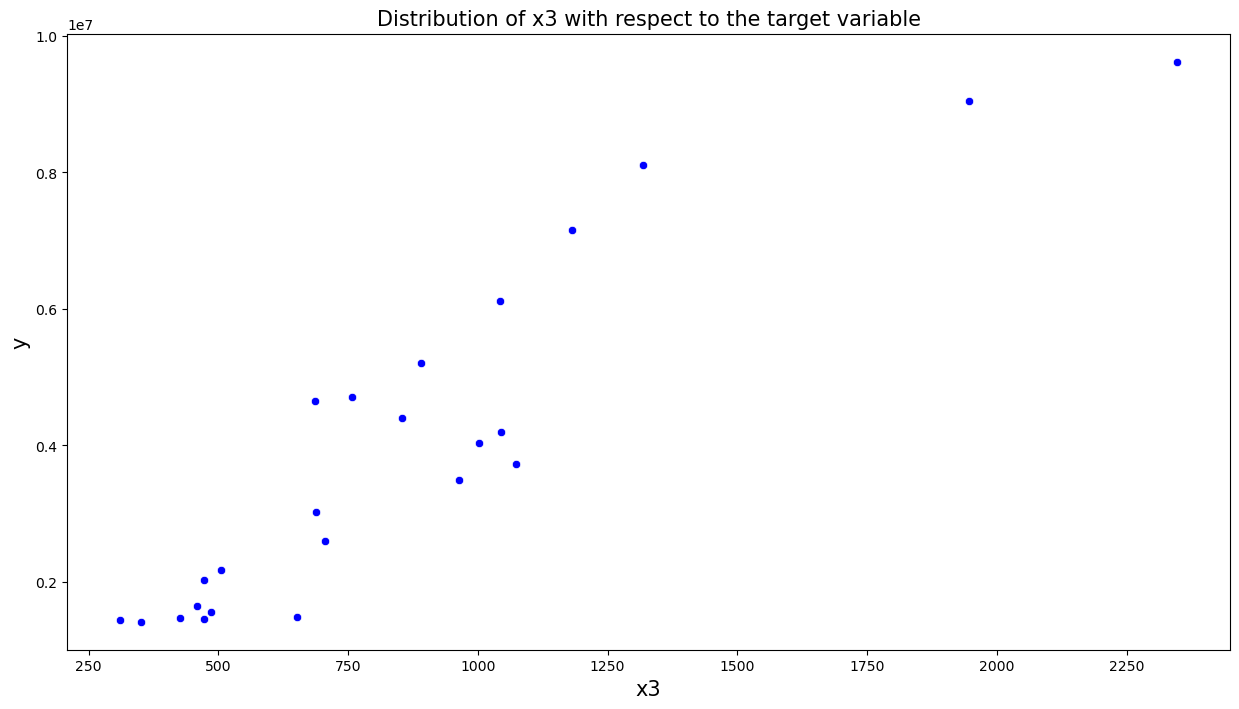

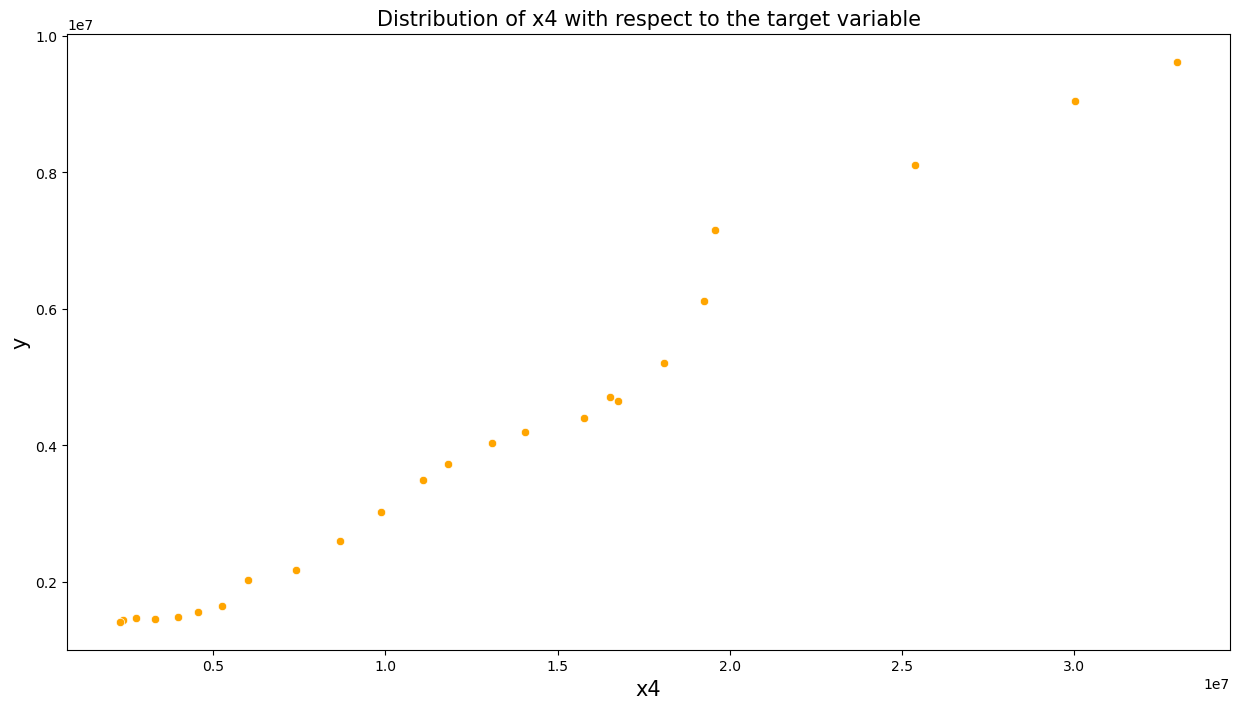

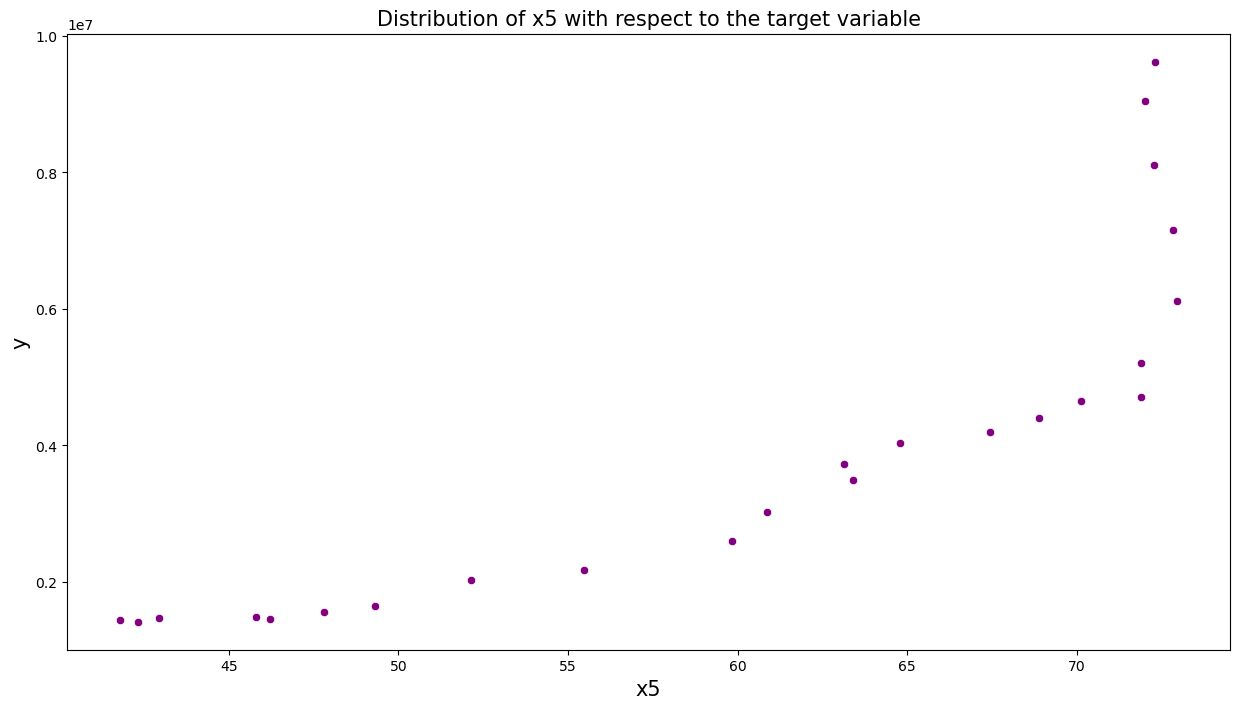

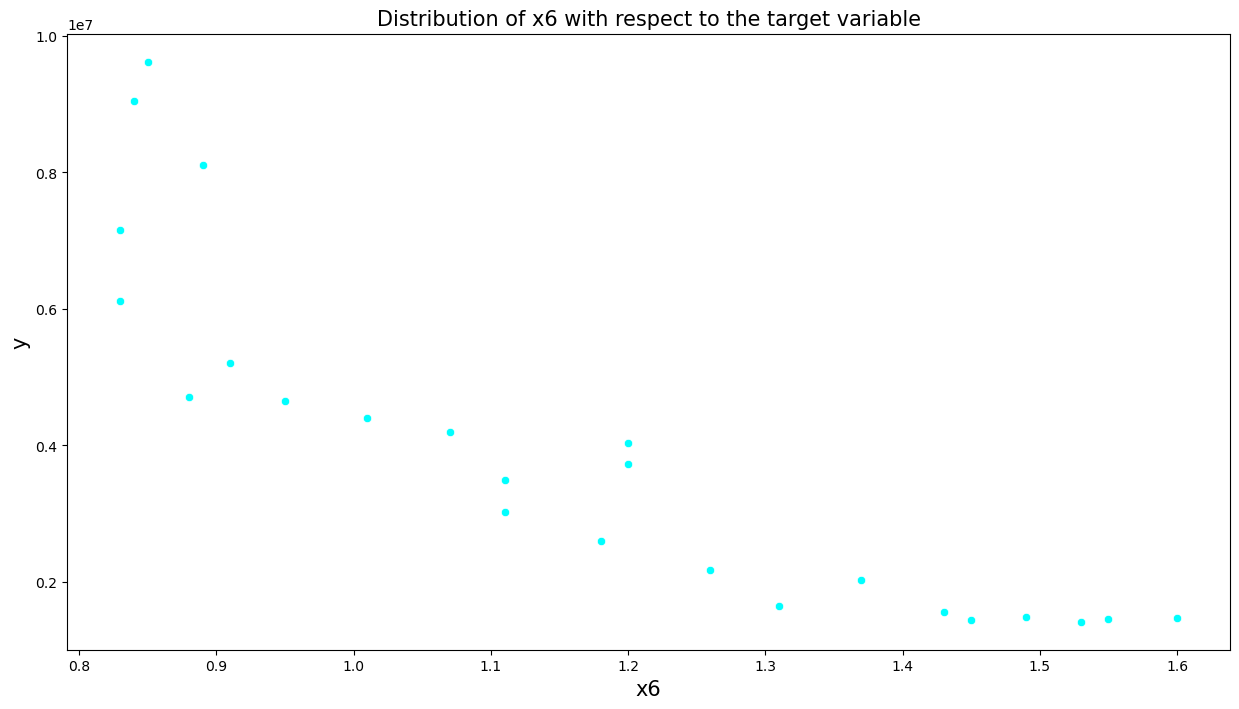

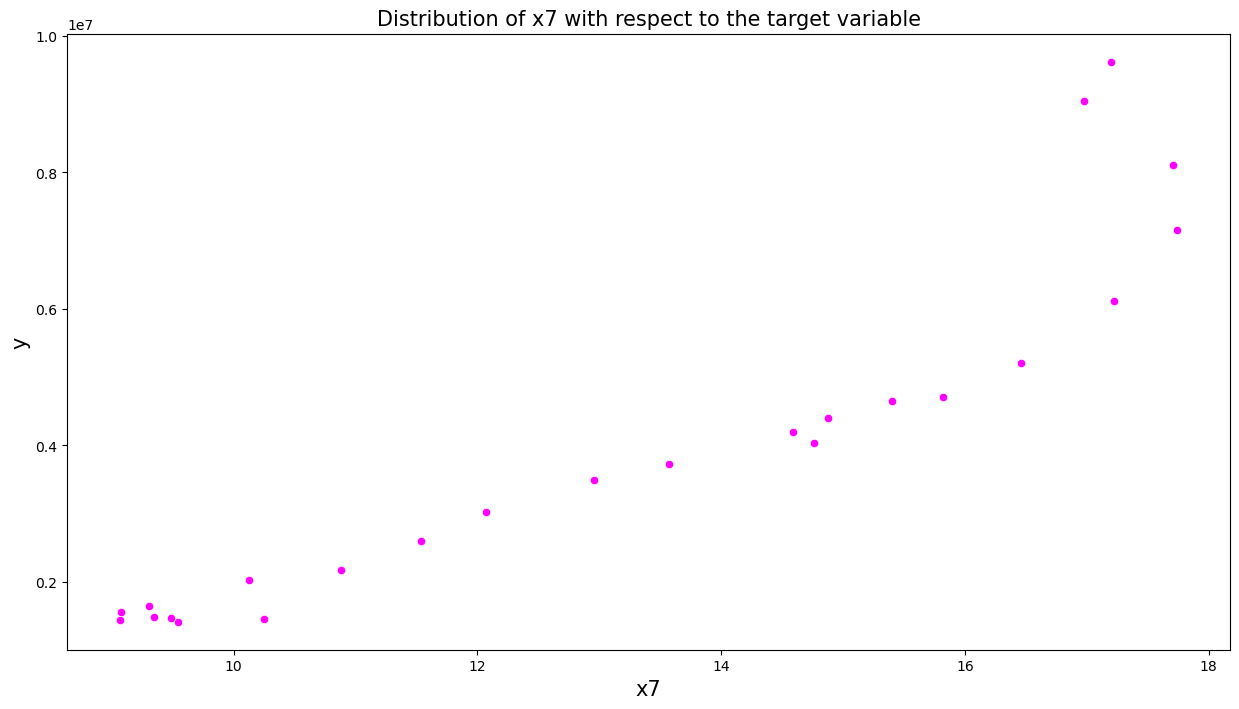

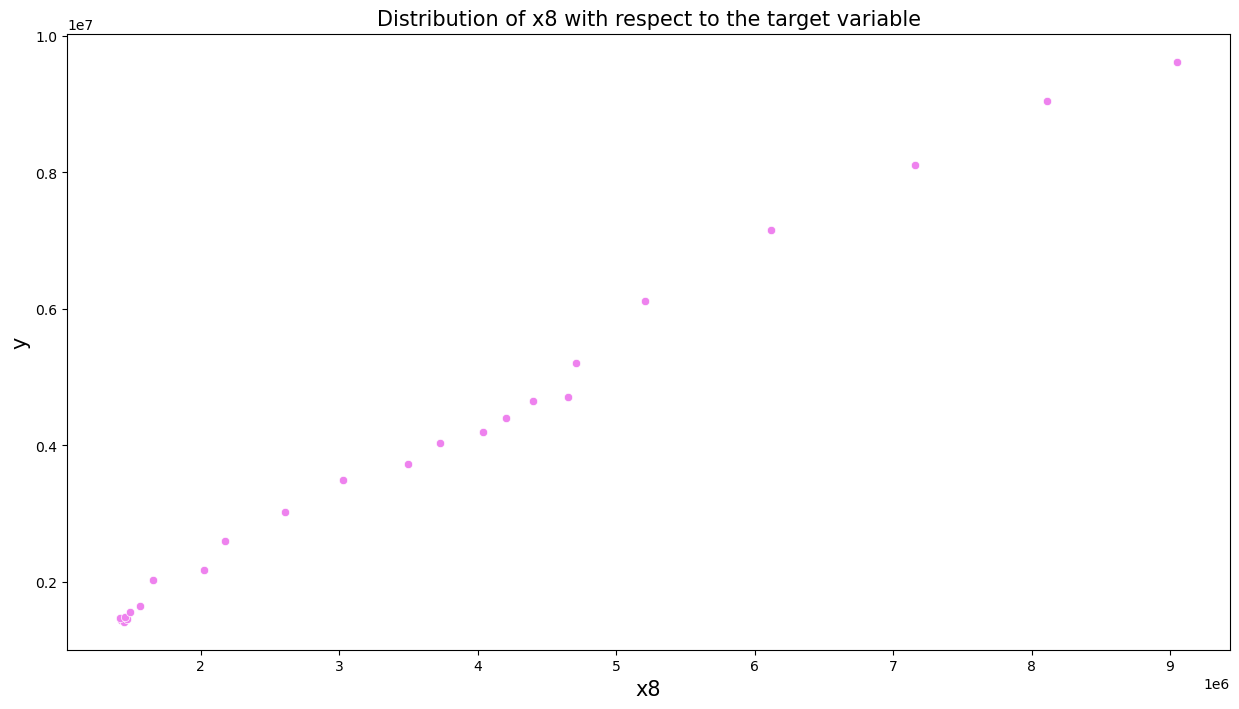

In [25]:
plt.rcParams['figure.figsize']=[15,8]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'violet']

for idx, column in enumerate(df.drop(['year', 'y'], axis=1)):
    sns.scatterplot(data=df, x=column, y='y', color=colors[idx])
    plt.xlabel(column, fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.title('Distribution of ' + column + ' with respect to the target variable', fontsize=15)
    plt.show()



By the above plots we are getting to see that there is a good correlation between independent and target variables

In [29]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df = df.copy()  # Create a copy of the dataframe to store the scaled data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled data
print("Scaled Data:")
print(df.head())


Scaled Data:
   year         y        x1        x2        x3        x4        x5        x6  \
0  1983 -1.018763 -1.147192 -1.018968 -1.150587 -1.196286 -1.655682  1.143750   
1  1984 -1.029166 -1.096892 -0.980703 -1.066743 -1.204630 -1.608374  1.459721   
2  1985 -1.009295 -1.044470 -0.926140 -0.909535 -1.150390 -1.554819  1.736196   
3  1986 -1.014009 -0.971746 -0.850673 -0.813114 -1.086782 -1.262049  1.538714   
4  1987 -0.999826 -0.917809 -0.811699 -0.435815 -1.007346 -1.298645  1.301735   

         x7        x8  
0 -1.307032 -0.991262  
1 -1.157079 -0.981785  
2 -1.173032 -0.993393  
3 -0.930556 -0.971220  
4 -1.217698 -0.976480  


Outliers:
    year         y        x1        x2        x3        x4        x5  \
20  2003  1.304047  1.274206  1.529552  0.673024  0.828407  1.114028   
21  2004  1.690430  1.632977  1.691824  0.962287  1.509145  1.064935   
22  2005  2.073034  2.221131  2.137895  2.276545  2.058373  1.040835   
23  2006  2.305481  2.375366  2.694155  3.117083  2.406127  1.067613   

          x6        x7        x8  
20 -1.305027  1.459111  1.136968  
21 -1.068048  1.449540  1.609989  
22 -1.265530  1.216635  2.041113  
23 -1.226034  1.286825  2.468019  


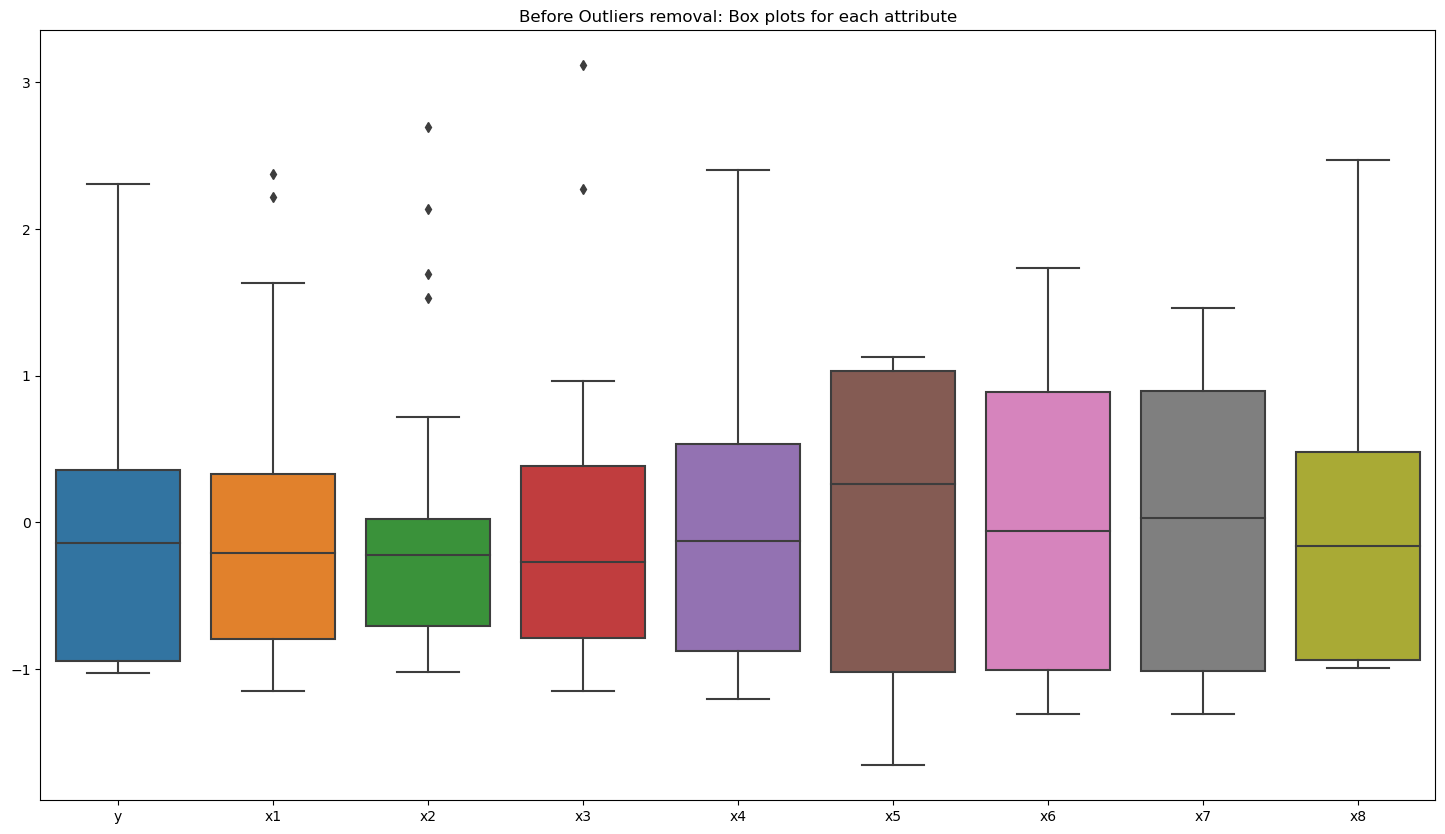

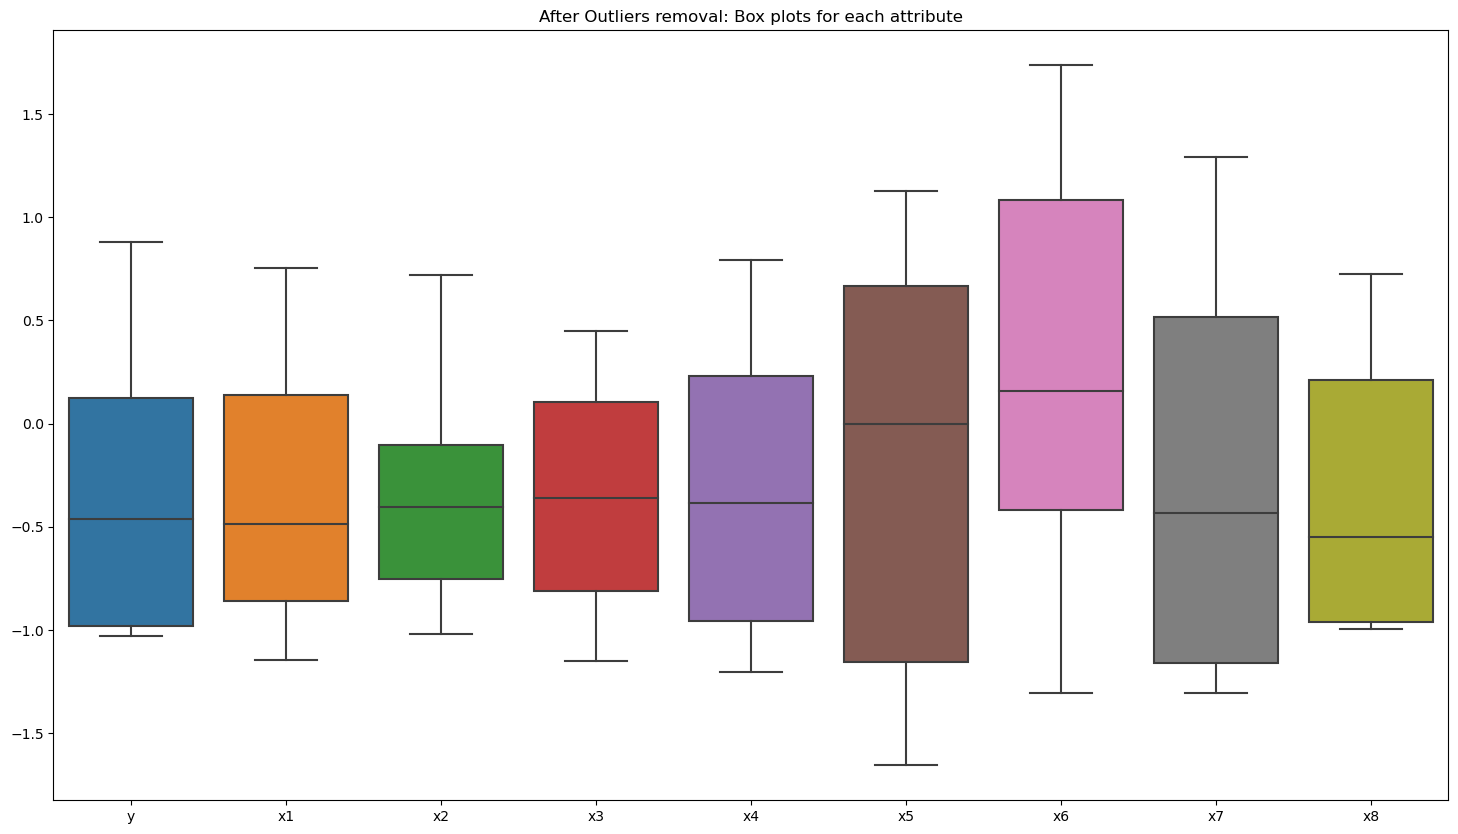

In [33]:
def detect_outliers(df, features):
    outlier_indices = []

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Determine a list of indices of outliers for feature
        outlier = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)].index
        
        # Append the found outlier indices for feature to the list of outlier indices
        outlier_indices.extend(outlier)

    # Select unique outlier observations
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Detect outliers from the dataset excluding the 'year' column
outlier_indices = detect_outliers(df, df.columns.drop('year'))

# Display the outliers
outliers = df.loc[outlier_indices]
print("Outliers:")
print(outliers)

# Plot box plots for each feature before outlier removal
plt.figure(figsize=(18, 10))
sns.boxplot(data=df.drop('year', axis=1))
plt.title('Before Outliers removal: Box plots for each attribute')
plt.show()

# Remove the outliers
df_no_outliers = df.drop(outlier_indices)

# Plot box plots again without outliers
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_no_outliers.drop('year', axis=1))
plt.title('After Outliers removal: Box plots for each attribute')
plt.show()


By seeing the above plots and information we are seeing what are the outliers in our dataset and also Box plots before and after outlier removal are plotted to visualize the effect of outlier removal on the data distribution.

### Now we can have the correlation matrix and heatmap for the correlation again for seeing how the correlation after removing the outliers:

In [34]:
corr_matrix_Nooutliers = df_no_outliers.corr()
corr_matrix_Nooutliers

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
year,1.000000,0.971368,0.987775,0.963593,0.820515,0.991701,0.989583,-0.961753,0.963990,0.964891
y,0.971368,1.000000,0.991769,0.973881,0.826973,0.989290,0.962947,-0.942445,0.990758,0.992135
x1,0.987775,0.991769,1.000000,0.977833,0.826563,0.994258,0.973841,-0.948787,0.982592,0.987769
x2,0.963593,0.973881,0.977833,1.000000,0.831253,0.963136,0.946436,-0.935570,0.947767,0.947477
x3,0.820515,0.826973,0.826563,0.831253,1.000000,0.814351,0.835261,-0.732353,0.824352,0.812229
x4,0.991701,0.989290,0.994258,0.963136,0.814351,1.000000,0.985608,-0.963787,0.983318,0.986617
x5,0.989583,0.962947,0.973841,0.946436,0.835261,0.985608,1.000000,-0.967284,0.961670,0.957071
x6,-0.961753,-0.942445,-0.948787,-0.935570,-0.732353,-0.963787,-0.967284,1.000000,-0.920635,-0.930962
x7,0.963990,0.990758,0.982592,0.947767,0.824352,0.983318,0.961670,-0.920635,1.000000,0.992596
x8,0.964891,0.992135,0.987769,0.947477,0.812229,0.986617,0.957071,-0.930962,0.992596,1.000000


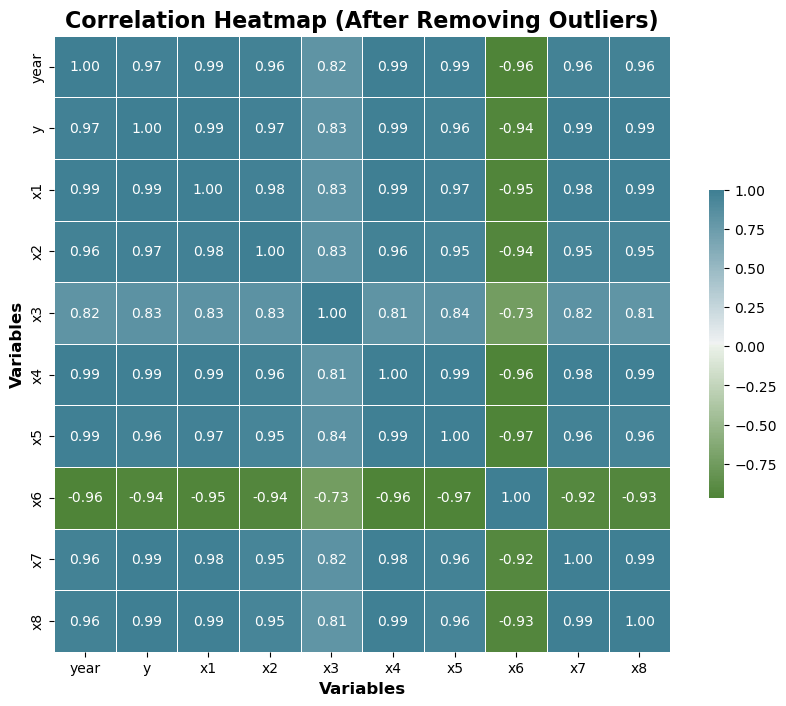

In [36]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap (After Removing Outliers)', fontsize=16, fontweight='bold')

sns.heatmap(corr_matrix_Nooutliers, annot=True, fmt=".2f", cmap=sns.diverging_palette(120, 220, n=200),
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')

plt.show()


### The above represents the heat map of the correlation of the dataset after removing the outliers.

## 10.2. Train a linear regression model using the 8 variables and data from the year 1983-1999. Predict the solution from the year 2000-2006. Compare the actual and the predicted solutions.

In [40]:
#Let's create a linear regression model to predict values and determine their correctness.

features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
target = 'y'

# Based on the year, divide the dataset into training and testing sets. 
traindata = df[df['year'] <= 1999]
testdata = df[df['year'] >= 2000]

# Fit the linear regression model on the training data
Linear_model = LinearRegression()
Linear_model.fit(traindata[features], traindata[target])

# Predict the target variable for the testing set
predictions = Linear_model.predict(testdata[features])

# Evaluate the model's performance
MSE = mean_squared_error(testdata[target], predictions)
R2 = r2_score(testdata[target], predictions)

# Display actual vs predicted values along with the performance metrics
comparison_df = testdata[['year', target]]
comparison_df['Predicted'] = predictions

print(comparison_df)
print(f"MeanSquaredError: {MSE}")
print(f"R-squared: {R2}")


    year         y  Predicted
17  2000  0.309967   0.353416
18  2001  0.510108   0.503239
19  2002  0.880114   0.891498
20  2003  1.304047   1.352642
21  2004  1.690430   1.777724
22  2005  2.073034   2.162955
23  2006  2.305481   2.796960
MeanSquaredError: 0.037383395082747906
R-squared: 0.9261056011195351


/var/folders/6w/wnnxqyz11mqdknfzhdr_rhzh0000gn/T/ipykernel_60232/2451769852.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['Predicted'] = predictions


In [42]:
#creating a linear regression model using a dataframe devoid of outliers.

features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
target = 'y'

# Split the dataset into training and testing sets based on the year
traindata = df_no_outliers[df_no_outliers['year'] <= 1999]
testdata = df_no_outliers[df_no_outliers['year'] >= 2000]

# Fitting the linear regression model on the training data
model = LinearRegression()
model.fit(traindata[features], traindata[target])

# Predicting the target variable for the testing set
predictions = model.predict(testdata[features])

# Evaluate the model's performance
mse = mean_squared_error(testdata[target], predictions)
r2 = r2_score(testdata[target], predictions)

# Display actual vs predicted values along with the performance metrics
comparison_df = testdata[['year', target]]
comparison_df['Predicted'] = predictions

print(comparison_df)
print(f"MeanSquaredError: {mse}")
print(f"R-squared: {r2}")

    year         y  Predicted
17  2000  0.309967   0.353416
18  2001  0.510108   0.503239
19  2002  0.880114   0.891498
MeanSquaredError: 0.0006881792002520691
R-squared: 0.9876628204060103


/var/folders/6w/wnnxqyz11mqdknfzhdr_rhzh0000gn/T/ipykernel_60232/1620164305.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['Predicted'] = predictions


/var/folders/6w/wnnxqyz11mqdknfzhdr_rhzh0000gn/T/ipykernel_60232/3594921560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['predictions'] = model.predict(train_data[features])
/var/folders/6w/wnnxqyz11mqdknfzhdr_rhzh0000gn/T/ipykernel_60232/3594921560.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = model.predict(test_data[features])


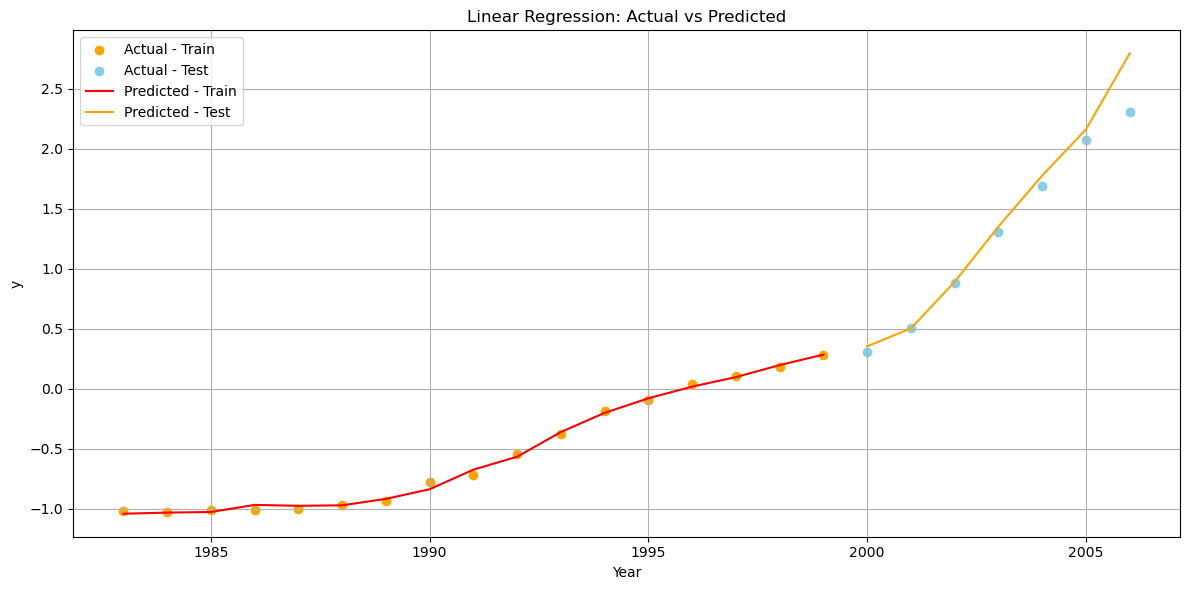

In [48]:

# Split the data into training and testing sets based on the year
train_data = df[df['year'] <= 1999]
test_data = df[df['year'] >= 2000]

# Define features and target variables
features = train_data.columns.drop(['year', 'y'])  # assuming 'y' is the target and 'year' is not a feature
target = 'y'

# Fit the linear regression model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Make predictions using the model for both train and test sets
train_data['predictions'] = model.predict(train_data[features])
test_data['predictions'] = model.predict(test_data[features])

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for actual values
plt.scatter(train_data['year'], train_data[target], color='orange', label='Actual - Train')
plt.scatter(test_data['year'], test_data[target], color='skyblue', label='Actual - Test')

# Line plot for predicted values
plt.plot(train_data['year'], train_data['predictions'], color='red', linestyle='-', label='Predicted - Train')
plt.plot(test_data['year'], test_data['predictions'], color='orange', linestyle='-', label='Predicted - Test')

# Additional Information
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


### The above plot shows the plot between the actual and predicted values of the training and the test data

/var/folders/6w/wnnxqyz11mqdknfzhdr_rhzh0000gn/T/ipykernel_60232/2547200082.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_no_outliers['predictions'] = model_no_outliers.predict(train_data_no_outliers[features_no_outliers])
/var/folders/6w/wnnxqyz11mqdknfzhdr_rhzh0000gn/T/ipykernel_60232/2547200082.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_no_outliers['predictions'] = model_no_outliers.predict(test_data_no_outliers[features_no_outliers])


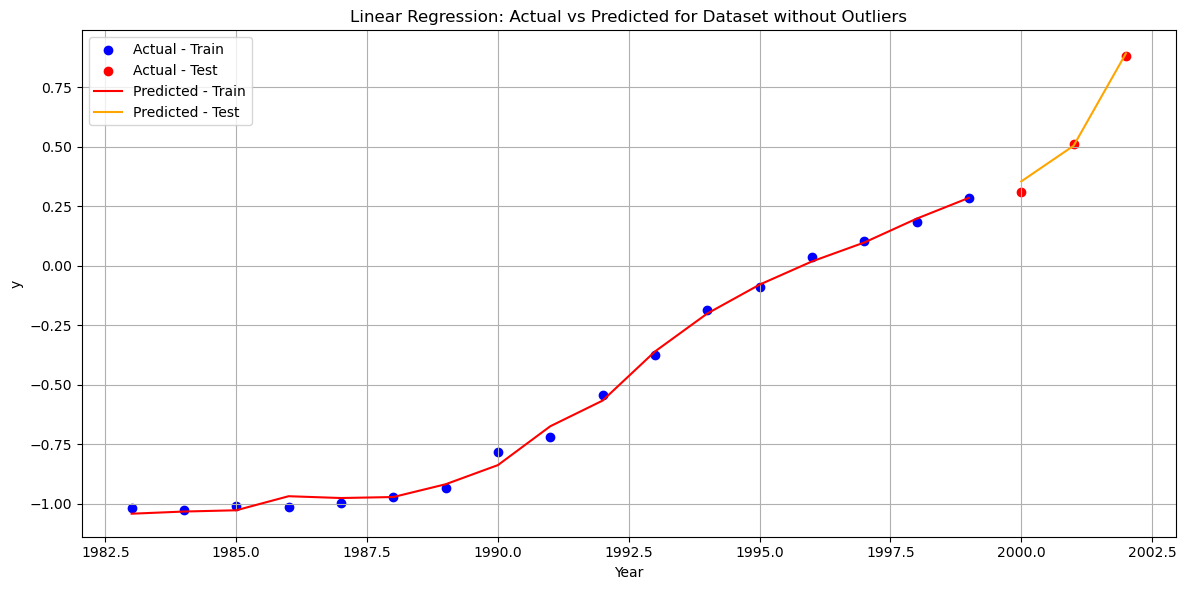

In [54]:

# Split the dataset into training and testing sets based on the year
train_data_no_outliers = df_no_outliers[df_no_outliers['year'] <= 1999]
test_data_no_outliers = df_no_outliers[df_no_outliers['year'] >= 2000]

# Define features and target variables
features_no_outliers = train_data_no_outliers.columns.drop(['year', 'y'])  # Exclude 'year' from features, assuming 'y' is the target variable
target_no_outliers = 'y'

# Fit a linear regression model on the training data
model_no_outliers = LinearRegression()
model_no_outliers.fit(train_data_no_outliers[features_no_outliers], train_data_no_outliers[target_no_outliers])

# Make predictions using the trained model for both training and testing sets
train_data_no_outliers['predictions'] = model_no_outliers.predict(train_data_no_outliers[features_no_outliers])
test_data_no_outliers['predictions'] = model_no_outliers.predict(test_data_no_outliers[features_no_outliers])

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for actual values (training and testing)
plt.scatter(train_data_no_outliers['year'], train_data_no_outliers[target_no_outliers], color='blue', label='Actual - Train')
plt.scatter(test_data_no_outliers['year'], test_data_no_outliers[target_no_outliers], color='red', label='Actual - Test')

# Line plot for predicted values (training and testing)
plt.plot(train_data_no_outliers['year'], train_data_no_outliers['predictions'], color='red', linestyle='-', label='Predicted - Train')
plt.plot(test_data_no_outliers['year'], test_data_no_outliers['predictions'], color='orange', linestyle='-', label='Predicted - Test')

# Additional Information
plt.title('Linear Regression: Actual vs Predicted for Dataset without Outliers')
plt.xlabel('Year')
plt.ylabel(target_no_outliers)
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout for better appearance

# Show the plot
plt.show()


After conducting Linear Regression on the dataset with and without outliers, noticeable differences emerge in the training dataset. When outliers are included in the analysis, there appears to be a balanced relationship between the training and test datasets, with a positive range of predicted values for both. Conversely, excluding outliers leads to a significant increase in the training dataset and a notable decrease in the test dataset. This indicates a trend of overfitting, where the model is excessively tailored to the training data, resulting in less accurate predictions for the test dataset.

Given these observations, 
#### it's evident that there's no need to remove outliers from the dataset. 
The portion of data used for training already lacks outliers. Therefore, altering the whisker points to forcibly remove outliers could disrupt the dataset's overall distribution and affect computation results.

## 10.3. Use the following four variables only and repeat the model training. Compare the error between using 8 variable model and 4 variable model to see which model is better. 

## X2 = Wells coming online that were shut 

## X4 = The injected water volume last year 

## X5 = The oil moisture content of last year 

## X7 = The recovery percent of last year

In [61]:
# Select the subset of the data from the years 1983-1999 for training
train_data_subset = df[df['year'] <= 1999]
# Select the subset of the data from the years 2000-2006 for testing
test_data_subset = df[df['year'] >= 2000]

# Define the features for the 4-variable model
features_4 = ['x2', 'x4', 'x5', 'x7']
# Define the features for the 8-variable model (assuming 'x1' to 'x8' are your features)
features_8 = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Train the 4-variable model
model_4 = LinearRegression()
model_4.fit(train_data_subset[features_4], train_data_subset['y'])

# Train the 8-variable model
model_8 = LinearRegression()
model_8.fit(train_data_subset[features_8], train_data_subset['y'])

# Make predictions using both models
predictions_4 = model_4.predict(test_data_subset[features_4])
predictions_8 = model_8.predict(test_data_subset[features_8])

# Calculate the MSE for both models
mse_4 = mean_squared_error(test_data_subset['y'], predictions_4)
mse_8 = mean_squared_error(test_data_subset['y'], predictions_8)

# Compare the MSE values to see which model is better
print(f'MSE for 4-variable model: {mse_4}')
print(f'MSE for 8-variable model: {mse_8}')

# Lower MSE indicates a better model
if mse_4 < mse_8:
    print("The four-variable model works better.")
else:
    print("The eight-variable model works better.")


MSE for 4-variable model: 0.00965985181191981
MSE for 8-variable model: 0.037383395082747906
The four-variable model works better.


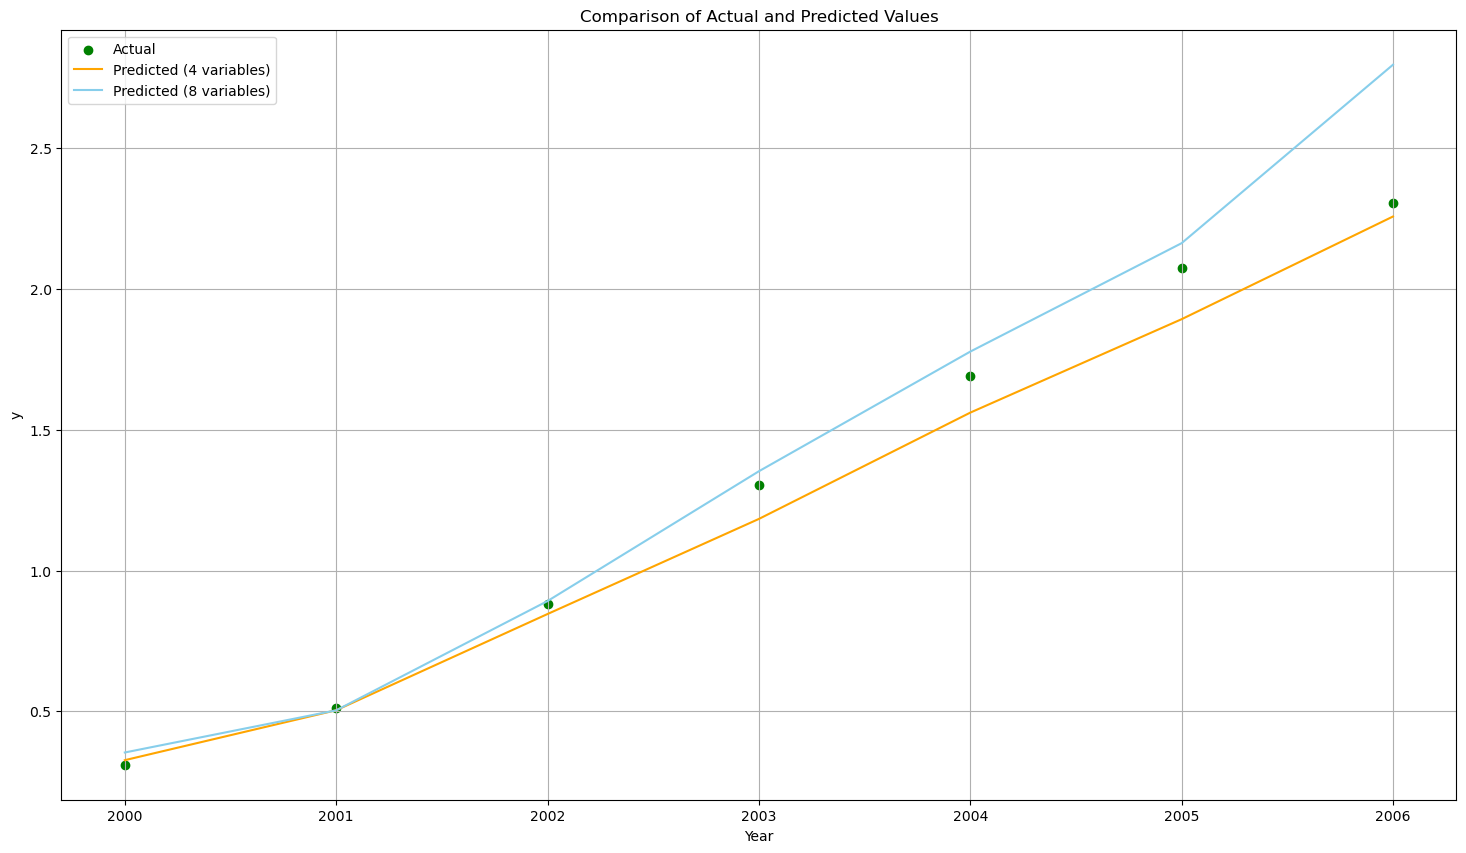

In [67]:
# Plotting the actual and predicted values
plt.figure(figsize=(18, 10))

# Actual values
plt.scatter(test_data_subset['year'], test_data_subset['y'], color='green', label='Actual')

# Predictions from the 4-variable model
plt.plot(test_data_subset['year'], predictions_4, color='orange', label='Predicted (4 variables)')

# Predictions from the 8-variable model
plt.plot(test_data_subset['year'], predictions_8, color='skyblue', label='Predicted (8 variables)')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Year')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## 10.4. Use the 4 variable model from the previous training data and a new model trained from the “China_Oilfield_2.csv” data from the year 1983-1999 to predict the production between 2000-2006 and compare the error to see which model performs better.r.

In [71]:
new_data = pd.read_csv('China_Oilfield_2.csv')
new_data.head()

,year,ynew,x2new,x4new,x5new,x7new
0,1983,1352300,407,1564500,40.96,8.92
1,1984,1326700,515,1493600,41.49,9.39
2,1985,1375600,669,1954500,42.09,9.34
3,1986,1364000,882,2495000,45.37,10.10
4,1987,1398900,992,3170000,44.96,9.20


In [72]:
#Let's Load the datasets again
data_original = pd.read_csv('China_Oilfield.csv')
new_data = pd.read_csv('China_Oilfield_2.csv')

#Let's perform Standard Scaling to bring all the data instances to the same scale on the original dataset
columns_to_scale = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
data_original = data_original.copy()
data_original[columns_to_scale] = scaler.fit_transform(data_original[columns_to_scale])

#Let's perform Standard Scaling to bring all the data instances to the same scale on the new dataset
columns_to_scale = ['ynew', 'x2new', 'x4new', 'x5new','x7new']
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
new_data = new_data.copy()
new_data[columns_to_scale] = scaler.fit_transform(new_data[columns_to_scale])

# Split the datasets into training and testing sets
train_original = data_original[data_original['year'] <= 1999]
test_original = data_original[data_original['year'] >= 2000]

train_new = new_data[new_data['year'] <= 1999]
test_new = new_data[new_data['year'] >= 2000]

# Train the model on the original dataset
model_original = LinearRegression()
model_original.fit(train_original[['x2', 'x4', 'x5', 'x7']], train_original['y'])

# Train the model on the new dataset
model_new = LinearRegression()
model_new.fit(train_new[['x2new', 'x4new', 'x5new', 'x7new']], train_new['ynew'])

# Predict on the test sets
pred_original = model_original.predict(test_original[['x2', 'x4', 'x5', 'x7']])
pred_new = model_new.predict(test_new[['x2new', 'x4new', 'x5new', 'x7new']])

# Calculate MSE for both models
mse_original = mean_squared_error(test_original['y'], pred_original)
mse_new = mean_squared_error(test_new['ynew'], pred_new)

# Output the MSE values
print('MSE with original dataset model:', mse_original)
print('MSE with new dataset model:', mse_new)

# Determine which model has a lower MSE
if mse_original < mse_new:
    print("The model trained on the original dataset performs better.")
else:
    print("The model trained on the new dataset performs better.")

MSE with original dataset model: 0.00965985181191981
MSE with new dataset model: 0.006113663504043443
The model trained on the new dataset performs better.


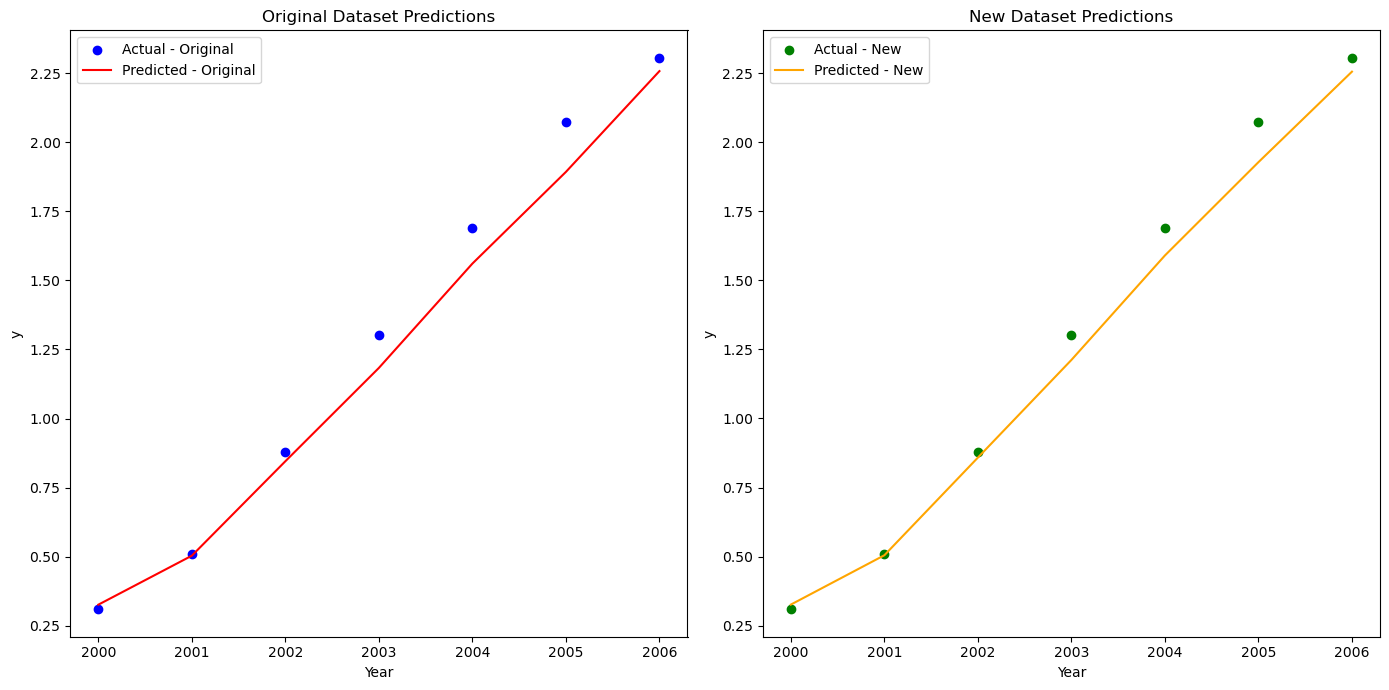

In [73]:
# Plotting setup
plt.figure(figsize=(14, 7))

# Plot for the original dataset model
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(test_original['year'], test_original['y'], color='blue', label='Actual - Original')
plt.plot(test_original['year'], pred_original, color='red', label='Predicted - Original')
plt.title('Original Dataset Predictions')
plt.xlabel('Year')
plt.ylabel('y')
plt.legend()

# Plot for the new dataset model
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(test_new['year'], test_new['ynew'], color='green', label='Actual - New')
plt.plot(test_new['year'], pred_new, color='orange', label='Predicted - New')
plt.title('New Dataset Predictions')
plt.xlabel('Year')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


#### The above plot allows us to visually understand the chnage in predictions of the original dataset and the new dataset and we can clearly understand that the new dataset performs really well for the predictions as depicted in the above model